In [1]:
# Install dlib https://stackoverflow.com/questions/66180798/dlib-installed-but-cannot-open-it-mac-m1
import ipywidgets as widgets
from ipywidgets import interact
import cv2
import dlib
import matplotlib.pyplot as plt
from torch_mtcnn import detect_faces, show_bboxes
from PIL import Image
import os

In [34]:
image_path = "/Users/trananhvu/Documents/CV/CV_internship/face_detector/sample_image/test.jpeg"

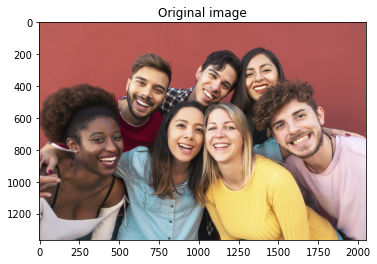

In [2]:
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original image")
plt.show()

# Viola jones

In [3]:
def viola_jones_face_detection(image_path):
    if os.path.isfile(image_path)==False:
        return "Path not exist"
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # Change path of haarcascade_frontalface_default.xml
    detector = cv2.CascadeClassifier("/Users/trananhvu/Documents/CV/CV_internship/model/haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector.detectMultiScale(gray, scaleFactor=1.05,
        minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(image)


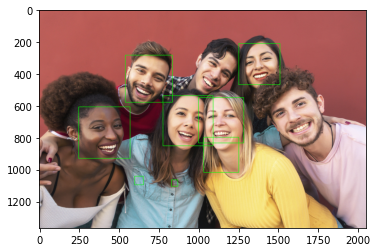

In [4]:
viola_jones_face_detection(image_path)

# HOG + SVM

In [5]:
# change from (left, top, right, bottom) to (x, y, w, h)
def convert_and_trim_bb(image, rect):
	startX = rect.left()
	startY = rect.top()
	endX = rect.right()
	endY = rect.bottom()

	startX = max(0, startX)
	startY = max(0, startY)
	endX = min(endX, image.shape[1])
	endY = min(endY, image.shape[0])

	w = endX - startX
	h = endY - startY

	return (startX, startY, w, h)

def hog_face_detection(image_path, upsample):
    if os.path.isfile(image_path)==False:
        return "Path not exist"
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    detector = dlib.get_frontal_face_detector()
    rects = detector(image, upsample)
    boxes = [convert_and_trim_bb(image, r) for r in rects]
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    plt.imshow(image)

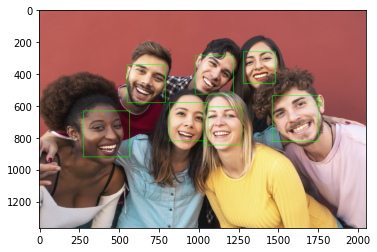

In [6]:
hog_face_detection(image_path, upsample=3)

# MTCNN

In [7]:
img = Image.open(image_path)
bounding_boxes, landmarks = detect_faces(img)

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


In [8]:
bounding_boxes

array([[7.98271842e+02, 5.25846879e+02, 1.04211434e+03, 8.63659132e+02,
        1.00000000e+00],
       [5.47481381e+02, 2.62791392e+02, 7.96483412e+02, 5.87656604e+02,
        9.99999881e-01],
       [2.44940894e+02, 6.00646053e+02, 5.18548402e+02, 9.51485491e+02,
        9.99996305e-01],
       [1.26896422e+03, 2.00757152e+02, 1.49037929e+03, 4.87229402e+02,
        9.99749482e-01],
       [1.44440767e+03, 4.74760625e+02, 1.75567508e+03, 8.39369963e+02,
        9.99601662e-01],
       [9.84594981e+02, 2.46450117e+02, 1.21833622e+03, 5.21484974e+02,
        9.98867273e-01],
       [1.04493258e+03, 5.57252944e+02, 1.27205506e+03, 8.65331738e+02,
        9.97614384e-01]])

In [9]:
landmarks

array([[ 890.111  ,  997.97095,  942.7704 ,  866.1647 ,  974.4224 ,
         648.9001 ,  674.15656,  712.6913 ,  757.5117 ,  784.2997 ],
       [ 638.1988 ,  745.4559 ,  671.7464 ,  594.32385,  697.69226,
         375.9863 ,  430.89127,  463.387  ,  472.29172,  527.95953],
       [ 372.3542 ,  491.80676,  469.8787 ,  370.4831 ,  493.9301 ,
         736.8873 ,  721.6208 ,  800.05176,  855.3266 ,  839.2769 ],
       [1319.9677 , 1422.139  , 1374.3335 , 1340.1401 , 1435.4933 ,
         324.60455,  302.83875,  359.2927 ,  418.3326 ,  398.10434],
       [1515.1508 , 1640.4886 , 1591.9606 , 1567.0514 , 1694.342  ,
         646.60474,  586.6288 ,  686.3034 ,  758.5742 ,  703.9404 ],
       [1088.1459 , 1171.6274 , 1102.952  , 1018.6002 , 1108.4086 ,
         334.83923,  402.63776,  430.09735,  416.4127 ,  480.3111 ],
       [1090.9933 , 1196.4966 , 1126.3289 , 1091.1362 , 1203.2263 ,
         664.26843,  661.7023 ,  713.2168 ,  770.589  ,  769.90656]],
      dtype=float32)

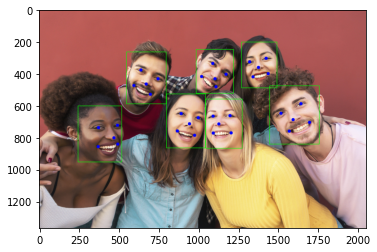

In [27]:
image = cv2.imread("/Users/trananhvu/Documents/CV/CV_internship/sample_image/Test2.jpeg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
for i in bounding_boxes:
  x1=int(i[0])
  y1=int(i[1])
  x2=int(i[2])
  y2=int(i[3])
  cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
for i in landmarks:
  for j in range(int(len(i)/2)):
    x=int(i[j])
    y=int(i[j+5])
    cv2.circle(image, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
  
plt.imshow(image)